# Preparación de series temporales
- En este notebook se realiza una primera inspección inicial para preparar las series para un preprocesamiento adecuado.

## 1. Cargar datos

In [1]:
import pandas as pd
import numpy as np
import os

Realizamos una inspección inicial

In [2]:
df= pd.read_csv("../data/raw/20250305parking.csv")
df.head()

/tmp/ipykernel_37310/4053242149.py:1: DtypeWarning: Columns (3,4,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("../data/raw/20250305parking.csv")


,_id,entityId,entityType,availableSpotNumber,availableSpotPercentage,totalSpotNumber,idAparcamiento,recvTime,TimeInstant
0,60ac96fa18bc8169c538e90c,parking_120,OffStreetParking,177,41.067285,431.0,120,2021-05-25T06:19:37.561Z,NaN
1,60ac94de18bc8169c538de45,parking_120,OffStreetParking,185,42.923434,431.0,120,2021-05-25T06:10:36.959Z,NaN
2,60ac95cd18bc8169c538e29a,parking_120,OffStreetParking,177,41.067285,431.0,120,2021-05-25T06:14:37.251Z,NaN
3,60ac959418bc8169c538e1f5,parking_120,OffStreetParking,185,42.923434,431.0,120,2021-05-25T06:13:37.142Z,NaN
4,60ac95fc18bc8169c538e2a6,parking_75,OffStreetParking,181,67.037037,270.0,75,2021-05-25T06:15:24.306Z,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13086955 entries, 0 to 13086954
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   _id                      object 
 1   entityId                 object 
 2   entityType               object 
 3   availableSpotNumber      object 
 4   availableSpotPercentage  object 
 5   totalSpotNumber          float64
 6   idAparcamiento           object 
 7   recvTime                 object 
 8   TimeInstant              object 
dtypes: float64(1), object(8)
memory usage: 898.6+ MB


In [4]:
df.shape

(13086955, 9)

Observamos cuantos registros y NA hay por aparcamiento

In [5]:
df.groupby('idAparcamiento').count()

,_id,entityId,entityType,availableSpotNumber,availableSpotPercentage,totalSpotNumber,recvTime,TimeInstant
idAparcamiento,,,,,,,,
-100,180549,180549,180549,180548,180548,180549,180549,2
1,198656,198656,198656,198656,102699,198656,198656,0
2.0,1,1,1,1,0,1,1,0
3,9,9,9,4,0,9,9,0
4.0,116,116,116,116,0,116,116,0
5,1465344,1465344,1465344,1465337,1268329,1465344,1465344,631477
6,535677,535677,535677,535674,535673,535676,535677,313097
7.0,535815,535815,535815,535813,535697,535814,535815,313096
8,848020,848020,848020,848020,648525,848020,848020,204999


In [6]:
df.groupby("idAparcamiento").apply(lambda x: x.isna().sum())

/tmp/ipykernel_37310/1944368233.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("idAparcamiento").apply(lambda x: x.isna().sum())


,_id,entityId,entityType,availableSpotNumber,availableSpotPercentage,totalSpotNumber,idAparcamiento,recvTime,TimeInstant
idAparcamiento,,,,,,,,,
-100,0,0,0,1,1,0,0,0,180547
1,0,0,0,0,95957,0,0,0,198656
2.0,0,0,0,0,1,0,0,0,1
3,0,0,0,5,9,0,0,0,9
4.0,0,0,0,0,116,0,0,0,116
5,0,0,0,7,197015,0,0,0,833867
6,0,0,0,3,4,1,0,0,222580
7.0,0,0,0,2,118,1,0,0,222719
8,0,0,0,0,199495,0,0,0,643021


Eliminamos las siguientes columnas, ya que no las vamos a usar: `_id`, `availableSpotPercentage`, `TimeInstant`.

In [7]:
df.drop(["_id", "entityType", "availableSpotPercentage" ,"TimeInstant"], axis = 1, inplace= True)

Observamos los valores únicos de cada variable

In [8]:
df.entityId.unique()

array(['parking_120', 'parking_75', 'parking_8', 'parking_1', 'parking_5',
       'parking_3', 'parking_7', 'parking_4', 'parking_9', 'parking_10',
       'parking_2', 'devParking_5', 'OffStreetParking:devParking_5',
       'parking_13', 'parking_79', 'parking_6', 'parking_50',
       'parking_78', 'parking_34', 'parking_-100', 'parking_77'],
      dtype=object)

In [9]:
df.idAparcamiento.unique()

array([120, 75, 8, 1, 5, nan, 3, 9.0, 10.0, 4.0, 7.0, 2.0, 13, 79, 6, 50,
       78, 34, -100, 77, '8', '77', '75', '120', '78', '5', '34', '7',
       '79', '13', '50', '6', 'Sin Proyecto'], dtype=object)

In [10]:
df.availableSpotNumber.unique()

array([177, 185, 181, 144, 142, 135, 126, 119, 95, 85, 42, 60, 75, 76, 49,
       68, 63, 159, 141, 138, 47, 91, 67, 54, 53, 37, 178, 61, 156, 169,
       143, 155, 150, 107, 104, 74, 44, 26, 160, 115, 100, 77, 36, 158,
       103, 34, 58, 130, 86, 70, 164, 57, 80, 22, 31, 25, 15, 4, 1, 0, 8,
       5, 7, 51, 12, 6, 16, 10, 39, 35, 13, 18, 21, 2, 17, 24, 14, 11, 30,
       3, 9, 29, 40, 66, 72, 94, 28, 73, 84, 87, 82, 33, 50, 69, 90, 110,
       112, 113, 114, 117, 120, 122, 121, 127, 116, 96, 189, 240, 65, 241,
       188, 239, 187, 64, 237, 233, 180, 229, 224, 234, 232, 179, 235,
       184, 226, 238, 183, 231, 218, 194, 213, 207, 197, 210, 174, 219,
       222, 211, 203, 71, 196, 193, 195, 204, 230, 200, 236, 205, 242,
       243, 199, 227, 215, 214, 208, 198, 201, 228, 192, 190, 170, 146,
       59, 52, 79, 46, 182, 154, 149, 167, 151, 136, 45, 101, 55, 173,
       105, 41, 202, 186, 140, 88, 32, 168, 145, 19, 23, 43, 20, 83, 93,
       27, 124, 56, 111, 109, 89, 133, 99, 134, 97, 

In [11]:
df.totalSpotNumber.unique()

array([431., 270., 192., 176., 348.,  nan, 805., 380., 565., 255., 201.,
       168.,  34., 220., 234., 372., 100., 466., 375., 377., 229., 464.,
       219.,  92., 173.])

In [12]:
print("MÍNIMO", df.recvTime.min())
print("MÁXIMO", df.recvTime.max())

MÍNIMO 2020-03-03T08:36:20.863Z
MÁXIMO 2025-03-05T07:47:04.862Z


Convetir recvTime a columna tipo fecha y hacer que sea el índice de la serie

In [13]:
df["recvTime"] = pd.to_datetime(df["recvTime"])
df.set_index("recvTime", inplace=True)
df = df.sort_index()

In [14]:
df

,entityId,availableSpotNumber,totalSpotNumber,idAparcamiento
recvTime,,,,
2020-03-03 08:36:20.863000+00:00,parking_5,174,348.0,5
2020-03-03 08:36:20.882000+00:00,parking_8,41,192.0,8
2020-03-03 08:52:22.497000+00:00,parking_5,163,348.0,5
2020-03-03 08:52:22.524000+00:00,parking_8,38,192.0,8
2020-03-03 08:53:05.552000+00:00,parking_5,163,348.0,5
...,...,...,...,...
2025-03-05 07:46:34.286000+00:00,parking_77,80,173.0,77
2025-03-05 07:46:47.400000+00:00,parking_75,154,270.0,75
2025-03-05 07:46:52.296000+00:00,parking_78,321,464.0,78


# Tratamiento de errores
## Columna `idAparcamiento`

Observamos el nº de registros agrpuando por `idAparcamiento`

In [15]:
df.groupby("idAparcamiento").count()

,entityId,availableSpotNumber,totalSpotNumber
idAparcamiento,,,
-100,180549,180548,180549
1.0,198656,198656,198656
2.0,1,1,1
3,9,4,9
4.0,116,116,116
5,1465344,1465337,1465344
6,535677,535674,535676
7.0,535815,535813,535814
8,848020,848020,848020


-	Hay un dato cuyo idAparcamiento = “Sin Proyecto”

In [16]:
df[df['idAparcamiento'] == "Sin Proyecto"]

,entityId,availableSpotNumber,totalSpotNumber,idAparcamiento
recvTime,,,,
2024-04-11 07:18:25.233000+00:00,parking_6,Sin Proyecto,372.0,Sin Proyecto


Se elimina

In [17]:
df = df[df['idAparcamiento'] != "Sin Proyecto"]

Eliminar registros donde idAparcamiento == NaN

In [18]:
df = df.dropna(subset=['idAparcamiento'])

## Columna `entityId`

Observar el nº de registros agrupando por `entityId`

In [19]:
df.groupby("entityId").count()

,availableSpotNumber,totalSpotNumber,idAparcamiento
entityId,,,
OffStreetParking:devParking_5,0,1,1
devParking_5,0,1,1
parking_-100,180548,180549,180549
parking_1,198656,198656,198656
parking_10,175,175,175
parking_120,2174173,2174175,2174175
parking_13,539110,539112,539113
parking_2,1,1,1
parking_3,4,9,9


In [20]:
df["entityId"].unique()

array(['parking_5', 'parking_8', 'parking_120', 'parking_75', 'parking_1',
       'parking_3', 'parking_7', 'parking_4', 'parking_9', 'parking_10',
       'parking_2', 'OffStreetParking:devParking_5', 'devParking_5',
       'parking_79', 'parking_13', 'parking_50', 'parking_6',
       'parking_34', 'parking_78', 'parking_77', 'parking_-100'],
      dtype=object)

Observamos que el parking 5 tiene varios identificadores

In [21]:
df[df["entityId"] == "parking_5"]

,entityId,availableSpotNumber,totalSpotNumber,idAparcamiento
recvTime,,,,
2020-03-03 08:36:20.863000+00:00,parking_5,174,348.0,5
2020-03-03 08:52:22.497000+00:00,parking_5,163,348.0,5
2020-03-03 08:53:05.552000+00:00,parking_5,163,348.0,5
2020-03-03 08:56:00.625000+00:00,parking_5,163,348.0,5
2020-03-03 08:56:33.277000+00:00,parking_5,163,348.0,5
...,...,...,...,...
2025-03-05 07:42:52.410000+00:00,parking_5,141,234.0,5
2025-03-05 07:43:52.493000+00:00,parking_5,141,234.0,5
2025-03-05 07:44:52.595000+00:00,parking_5,141,234.0,5


In [22]:
df[df["entityId"] == "devParking_5"]

,entityId,availableSpotNumber,totalSpotNumber,idAparcamiento
recvTime,,,,
2022-09-12 11:48:16.687000+00:00,devParking_5,NaN,348.0,5.0


In [23]:
df[df["entityId"] == "OffStreetParking:devParking_5"]

,entityId,availableSpotNumber,totalSpotNumber,idAparcamiento
recvTime,,,,
2022-09-12 10:59:15.166000+00:00,OffStreetParking:devParking_5,NaN,348.0,5.0


Eliminar registros, donde `df["entityId"] == "OffStreetParking:devParking_5"` o `df["entityId"] == "devParking_5"`, ya que parecen errores

In [24]:
df = df[~(df["entityId"] == "OffStreetParking:devParking_5") |
        (df["entityId"] == "devParking_5")]

Para registros de un mismo parking, algunos tienen el valor de `idAparcamiento` en formato STR y otros en formato INT, pareciendo de parkings diferentes.

La suma de registros agrupando por parking (`idAparcamiento`) en formato INT y STR debe coincidir con el número de registros de `entityId`, donde no tenemos este problema de medición

In [25]:
df["idAparcamiento"].unique()

array([5, 8, 120, 75, 1.0, 3, 7.0, 4.0, 9.0, 10.0, 2.0, 79, 13, 50, 6, 34,
       78, 77, -100, '8', '77', '75', '120', '78', '34', '5', '50', '6',
       '7', '13', '79'], dtype=object)

In [26]:
index_8 = list(df["idAparcamiento"].unique()).index("8")

In [27]:
str_columns = df["idAparcamiento"].unique()[index_8:]
str_columns

array(['8', '77', '75', '120', '78', '34', '5', '50', '6', '7', '13',
       '79'], dtype=object)

In [28]:
for column in str_columns:
    print("id PARKING: ", column)

    #CALCULAR Nº REGISTROS PARA INT Y STR
    print("nº de registros en idAparcamiento formato STR:", df[df["idAparcamiento"] == column].count().iloc[0].item())
    print("nº de registros en idAparcamiento formato INT:", df[df["idAparcamiento"] == int(column)].count().iloc[0].item())
    
    #CALCULAR Nº REGISTROS PARA ENTITYID
    entityId_column = df[df["entityId"] == "parking_"+column].count().iloc[0].item()
    print("nº de registros en entityId", entityId_column)

    #
    condicion = df[df["idAparcamiento"] == column].count().iloc[0].item() + df[df["idAparcamiento"] == int(column)].count().iloc[0].item() == entityId_column
    print("La suma coincide" if condicion else "La suma no coincide")
    print("\n")


id PARKING:  8
nº de registros en idAparcamiento formato STR: 2183
nº de registros en idAparcamiento formato INT: 848020
nº de registros en entityId 850203
La suma coincide


id PARKING:  77
nº de registros en idAparcamiento formato STR: 13588
nº de registros en idAparcamiento formato INT: 1496585
nº de registros en entityId 1510173
La suma coincide


id PARKING:  75
nº de registros en idAparcamiento formato STR: 6789
nº de registros en idAparcamiento formato INT: 2304187
nº de registros en entityId 2310976
La suma coincide


id PARKING:  120
nº de registros en idAparcamiento formato STR: 5590
nº de registros en idAparcamiento formato INT: 2168585
nº de registros en entityId 2174175
La suma coincide


id PARKING:  78
nº de registros en idAparcamiento formato STR: 6794
nº de registros en idAparcamiento formato INT: 737551
nº de registros en entityId 744345
La suma coincide


id PARKING:  34
nº de registros en idAparcamiento formato STR: 6764
nº de registros en idAparcamiento formato INT

Viendo que todas cumplen la condición, fusionamos valores

In [29]:
int(str_columns[0])

8

In [30]:
for column in str_columns:
    int_value = int(column)
    # Reemplazar valores de tipo str por su equivalente int
    df.loc[df["idAparcamiento"] == column, "idAparcamiento"] = int_value


Eliminar columna `entityId`

In [31]:
df.drop("entityId", axis = 1, inplace = True)

## Columna `totalSpotNumber`

Observamos que hay varios parkings en los que varía el número de plazas disponibles con el tiempo, no debería ser así.

In [32]:
# Contar la cantidad de valores únicos de totalSpotNumber por idAparcamiento
aparcamientos_multiples = df.groupby("idAparcamiento")["totalSpotNumber"].nunique()

# Filtrar aquellos que tienen más de un valor distinto en totalSpotNumber
aparcamientos_con_multiples_valores = aparcamientos_multiples[aparcamientos_multiples > 1]
aparcamientos_con_multiples_valores

idAparcamiento
1.0     2
5.0     2
6.0     2
8.0     2
13.0    2
50.0    2
79.0    2
Name: totalSpotNumber, dtype: int64

In [33]:
# Obtener los valores específicos de totalSpotNumber para esos aparcamientos
df_multiples_valores = df[df["idAparcamiento"].isin(aparcamientos_con_multiples_valores.index)][["idAparcamiento", "totalSpotNumber"]].drop_duplicates()
df_multiples_valores.sort_values(by='idAparcamiento')


,idAparcamiento,totalSpotNumber
recvTime,,
2020-09-29 11:05:10.977000+00:00,1.0,176.0
2021-10-19 05:45:20.987000+00:00,1,220.0
2020-03-03 08:36:20.863000+00:00,5,348.0
2022-09-13 11:31:29.682000+00:00,5.0,234.0
2023-02-03 10:19:20.251000+00:00,6,372.0
2023-01-30 14:20:44.261000+00:00,6,NaN
2023-01-30 14:23:07.069000+00:00,6,100.0
2020-03-03 08:36:20.882000+00:00,8,192.0
2021-06-23 07:48:30.305000+00:00,8,34.0


In [34]:
for i in aparcamientos_con_multiples_valores.index:
    print("Parking con idAparcamiento: ", i)
    print(df[df["idAparcamiento"] == i].groupby("totalSpotNumber")["totalSpotNumber"].count())
    print("\n")

Parking con idAparcamiento:  1.0
totalSpotNumber
176.0    139103
220.0     59553
Name: totalSpotNumber, dtype: int64


Parking con idAparcamiento:  5.0
totalSpotNumber
234.0    1275126
348.0     197013
Name: totalSpotNumber, dtype: int64


Parking con idAparcamiento:  6.0
totalSpotNumber
100.0         2
372.0    539081
Name: totalSpotNumber, dtype: int64


Parking con idAparcamiento:  8.0
totalSpotNumber
34.0          1
192.0    850202
Name: totalSpotNumber, dtype: int64


Parking con idAparcamiento:  13.0
totalSpotNumber
229.0    539110
466.0         2
Name: totalSpotNumber, dtype: int64


Parking con idAparcamiento:  50.0
totalSpotNumber
100.0         2
377.0    538989
Name: totalSpotNumber, dtype: int64


Parking con idAparcamiento:  79.0
totalSpotNumber
372.0         2
375.0    539117
Name: totalSpotNumber, dtype: int64




- Los parkings 1 y 5 los debemos eliminar ya que en la mitad de los registros varía el número de plazas totales y no sabemos la razón.
-  Del resto, eliminamos los registros erróneos.

In [35]:
# Definir las condiciones a eliminar
condicion_eliminar = (
    ((df["idAparcamiento"] == 6) & (df["totalSpotNumber"] == 100)) |
    ((df["idAparcamiento"] == 8) & (df["totalSpotNumber"] == 34)) |
    ((df["idAparcamiento"] == 13) & (df["totalSpotNumber"] == 466)) |
    ((df["idAparcamiento"] == 50) & (df["totalSpotNumber"] == 100)) |
    ((df["idAparcamiento"] == 79) & (df["totalSpotNumber"] == 372)) |
    (df["totalSpotNumber"].isna())  # Eliminar registros donde totalSpotNumber es NaN
)

# Crear un nuevo DataFrame excluyendo esas filas
df = df[~condicion_eliminar]


## Columna `availableSpotNumber`
- La columna `availableSpotNumber` representa la ocupación total del parking en un instante determinado

In [36]:
df.availableSpotNumber.unique()

array([174, 41, 163, 38, 32, 141, 118, 21, 102, 19, 93, 16, 84, 82, 13,
       78, 14, 73, 79, 15, 77, 76, 20, 90, 97, 107, 9, 6, 5, 109, 4, 3, 7,
       127, 8, 135, 137, 10, 145, 152, 160, 173, 176, 177, 2, 1, 179, 0,
       180, 170, 169, 171, 168, 166, 11, 161, 155, 151, 150, 22, 140, 23,
       132, 28, 115, 30, 106, 29, 114, 119, 33, 35, 39, 110, 111, 40, 37,
       123, 43, 147, 146, 45, 48, 165, 51, 53, 175, 184, 56, 57, 191, 58,
       203, 206, 216, 218, 223, 225, 229, 232, 234, 236, 242, 243, 247,
       253, 257, 258, 259, 59, 260, 263, 267, 268, 60, 266, 269, 61, 62,
       63, 256, 238, 228, 55, 46, 204, 193, 42, 156, 24, 148, 143, 17,
       134, 124, 113, 12, 103, 95, 96, 98, 112, 121, 125, 133, 142, 158,
       162, 167, 178, 181, 182, 18, 25, 149, 27, 31, 36, 117, 34, 129,
       122, 52, 144, 54, 164, 64, 189, 200, 211, 217, 65, 221, 66, 227,
       230, 235, 239, 67, 240, 251, 74, 264, 75, 265, 80, 262, 261, 83,
       249, 214, 72, 70, 209, 68, 197, 153, 120, 50, 4

- Observamos valores positivos, negativos, en formato string y NA
- Eliminar NA y convertir a formato numérico

In [37]:
# Eliminar valores NaN en availableSpotNumber
df = df.dropna(subset=["availableSpotNumber"])

# Convertir valores que sean strings a enteros
df["availableSpotNumber"] = pd.to_numeric(df["availableSpotNumber"], errors="coerce").astype(int)

Hay posibles registros erróneos, donde la ocupación es negativa o supera el número de plazas totales del parking

In [38]:
#POSIBLES REGISTROS ERRONEOS DONDE: df["availableSpotNumber"] > df["totalSpotNumber"]
df[df["availableSpotNumber"] > df["totalSpotNumber"]].groupby("idAparcamiento").size()

idAparcamiento
-100    93523
 7       2284
 50      4311
 75       538
 77      1134
 78        81
dtype: int64

In [39]:
#POSIBLES REGISTROS ERRONEOS DONDE: df["availableSpotNumber"] < 0
df[df["availableSpotNumber"] < 0].groupby("idAparcamiento").size()

idAparcamiento
-100.0      754
 1.0          1
 2.0          1
 3.0          4
 4.0        116
 5.0      71063
 7.0        116
 8.0        121
 9.0        122
 10.0       122
 34.0      5035
 75.0      7526
 77.0     20554
 78.0        29
 120.0     3520
dtype: int64

In [40]:
import matplotlib.pyplot as plt
def plot_parking_data(id_parking):
    """
    Esta función recibe un DataFrame con los datos de un parking y muestra un gráfico con:
    - Una línea horizontal en totalSpotNumber
    - Otra línea horizontal en 0
    - Los valores de availableSpotNumber

    Args:
    parking_data (pd.DataFrame): DataFrame con los datos del parking
    """
    # Obtener el valor de totalSpotNumber (asumiendo que es constante para el parking)
    parking_data = df[df["idAparcamiento"] == id_parking]
    total_spot_number = parking_data['totalSpotNumber'].iloc[0]

    # Crear el gráfico
    print("ID de aparcamiento ", id_parking)
    plt.figure(figsize=(10, 6))
    plt.plot(parking_data.index, parking_data['availableSpotNumber'], label='Available Spot Number')
    plt.axhline(y=total_spot_number, color='r', linestyle='--', label='Total Spot Number')
    plt.axhline(y=0, color='g', linestyle='--', label='Zero Line')

    # Añadir etiquetas y título
    plt.xlabel('Time')
    plt.ylabel('Available Spot Number')
    plt.title('Parking Data')
    plt.legend()

    # Mostrar el gráfico
    plt.show()
    print("\n")

In [41]:
sorted(df.idAparcamiento.unique())

[-100,
 1.0,
 2.0,
 3,
 4.0,
 5,
 6,
 7.0,
 8,
 9.0,
 10.0,
 13,
 34,
 50,
 75,
 77,
 78,
 79,
 120]

ID de aparcamiento  -100


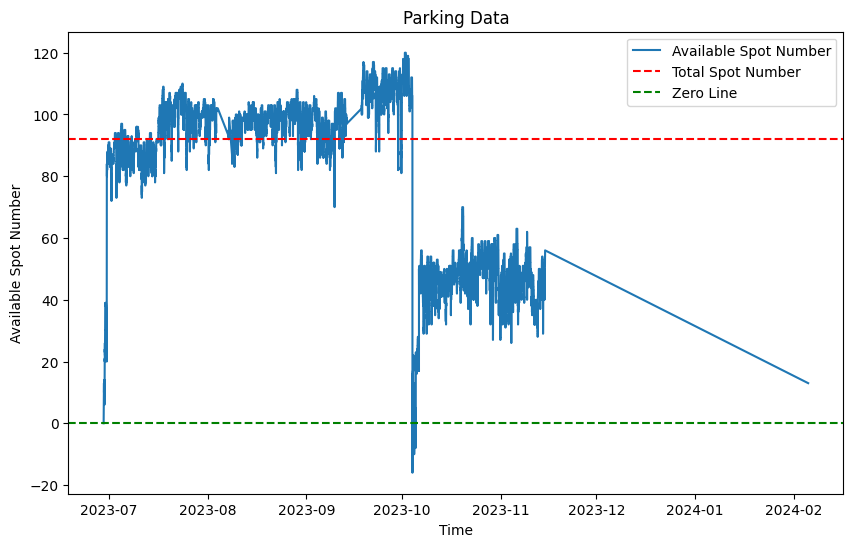



ID de aparcamiento  1.0


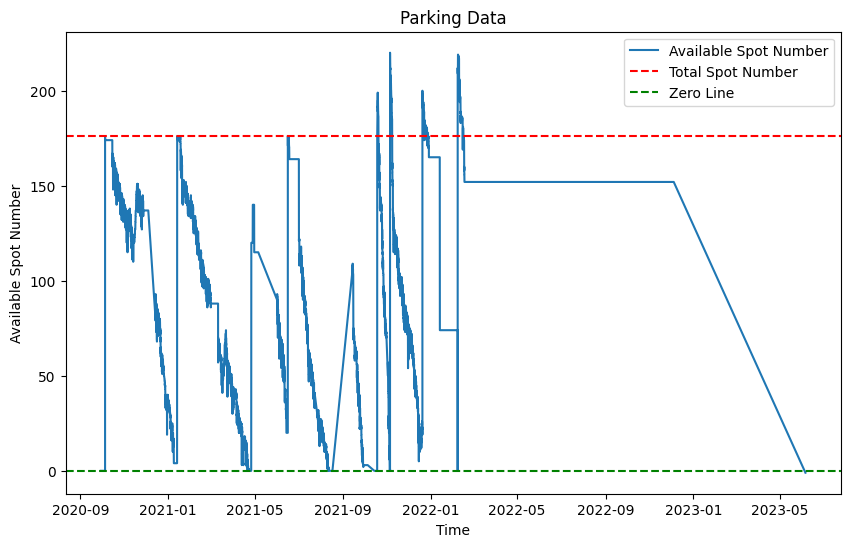



ID de aparcamiento  2.0


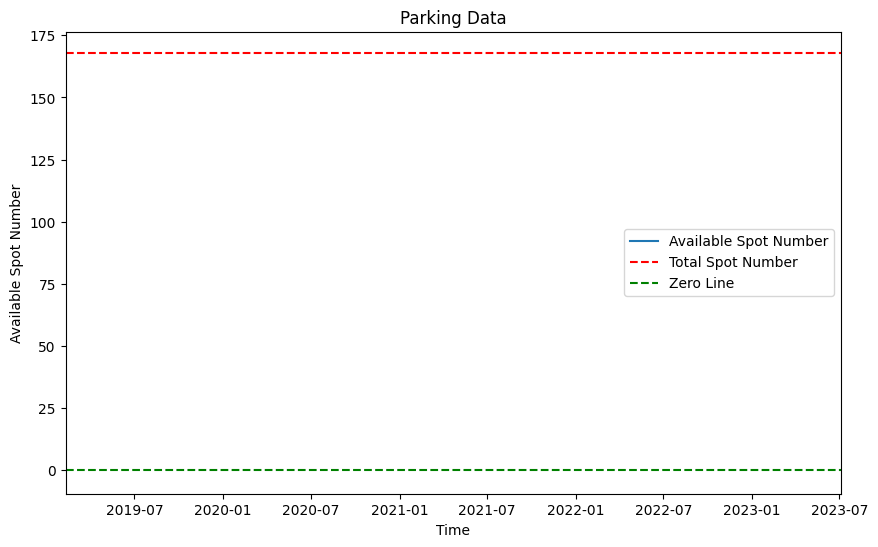



ID de aparcamiento  3


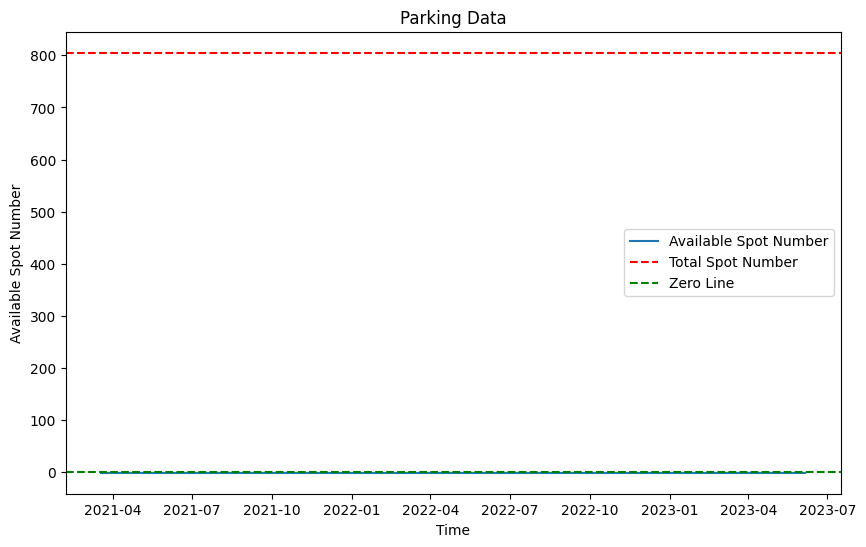



ID de aparcamiento  4.0


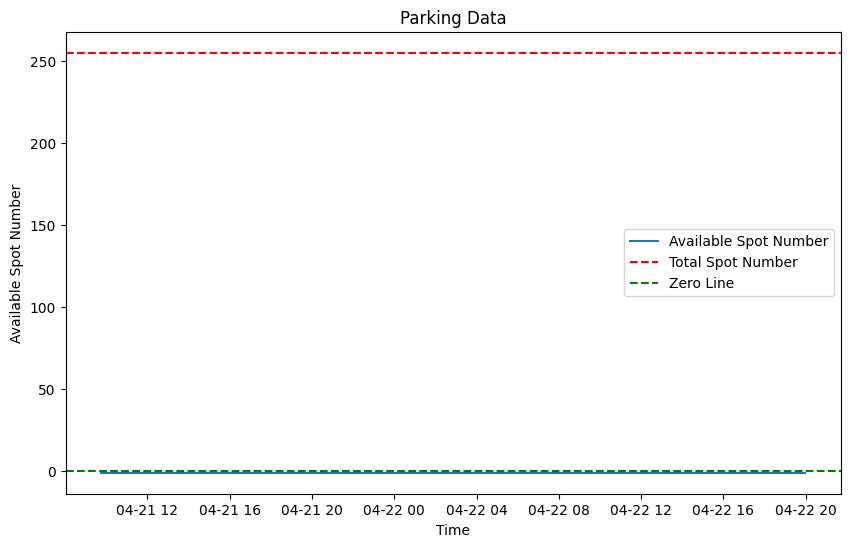



ID de aparcamiento  5


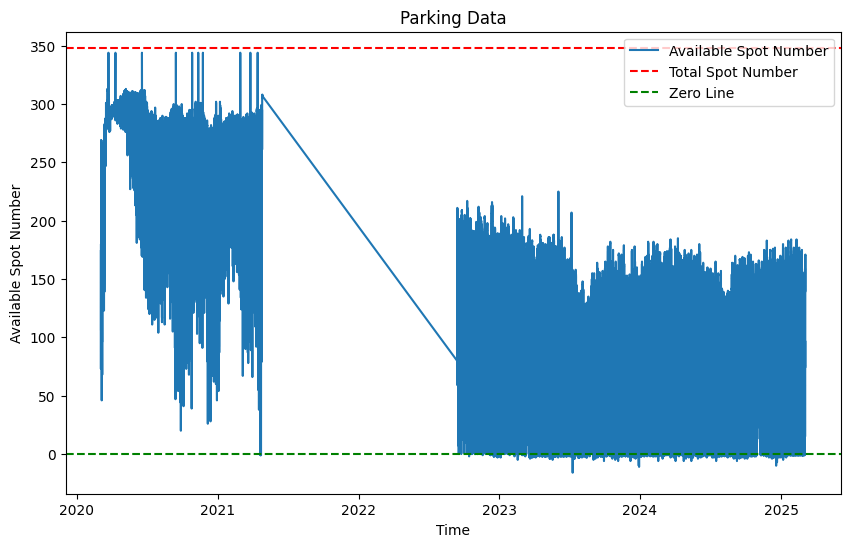



ID de aparcamiento  6


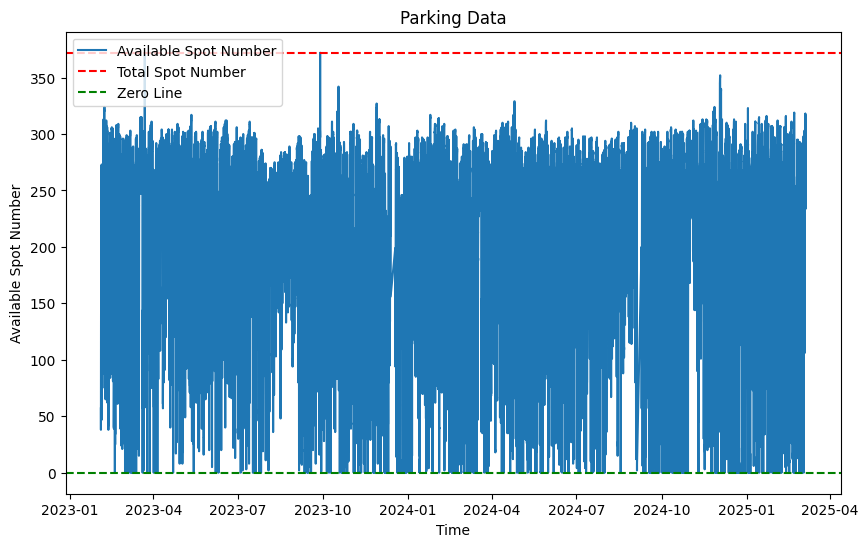



ID de aparcamiento  7.0


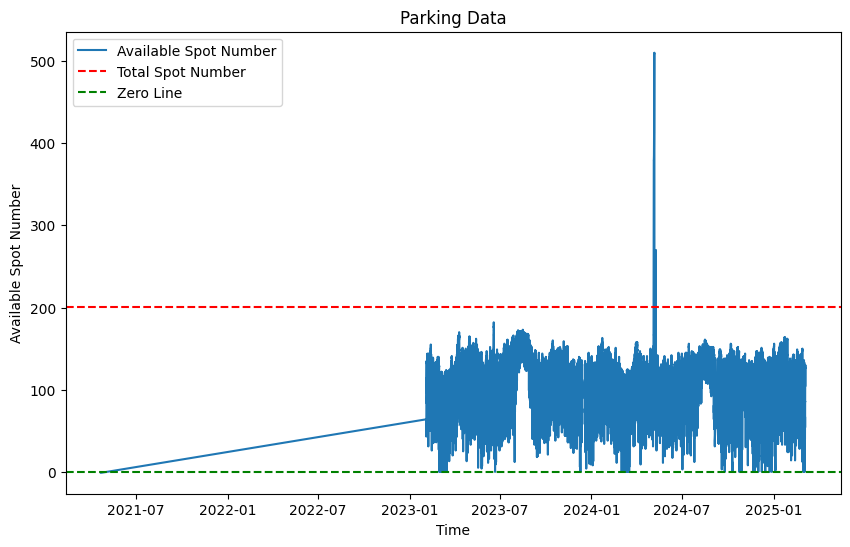



ID de aparcamiento  8


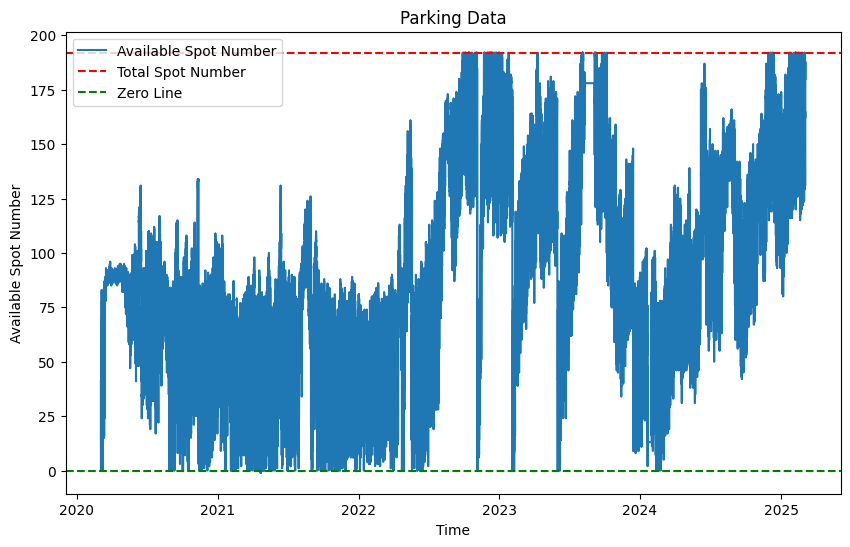



ID de aparcamiento  9.0


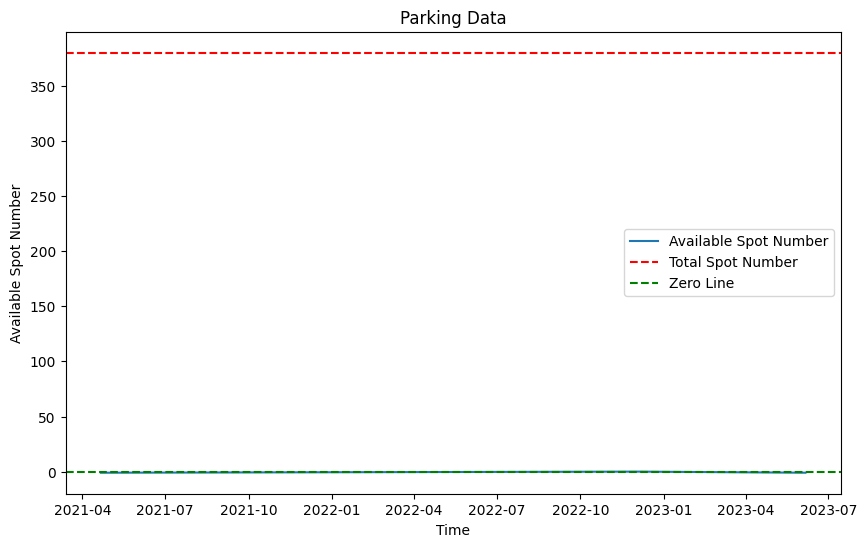



ID de aparcamiento  10.0


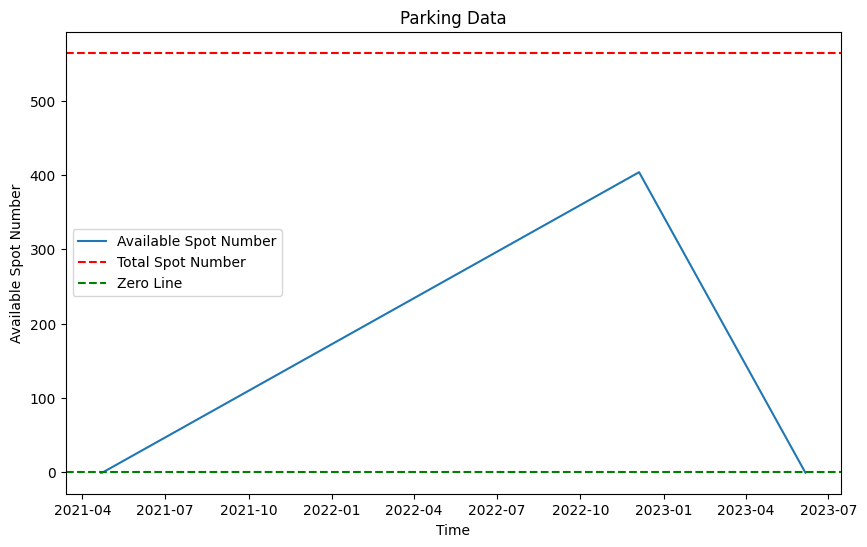



ID de aparcamiento  13


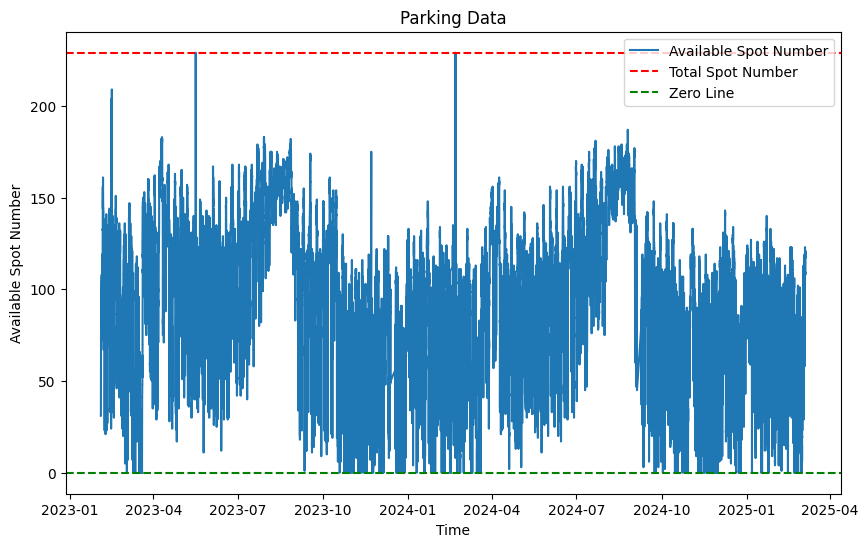



ID de aparcamiento  34


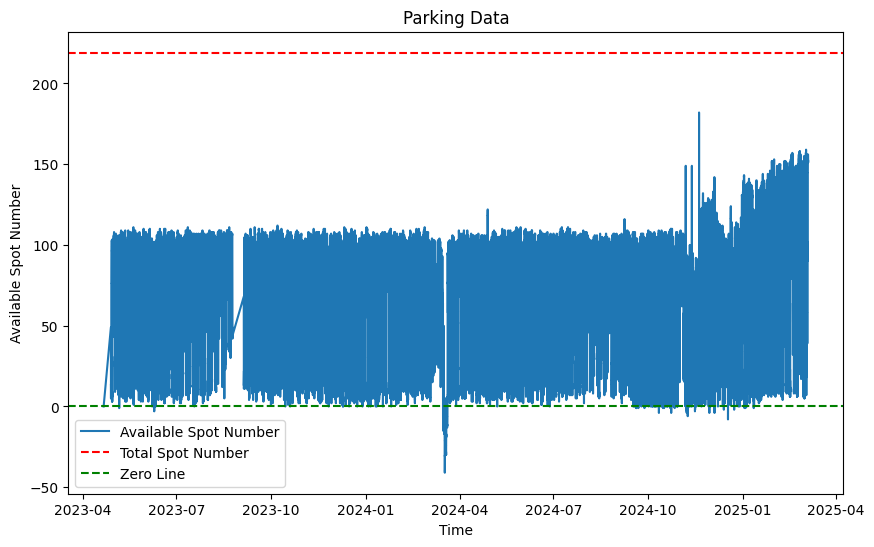



ID de aparcamiento  50


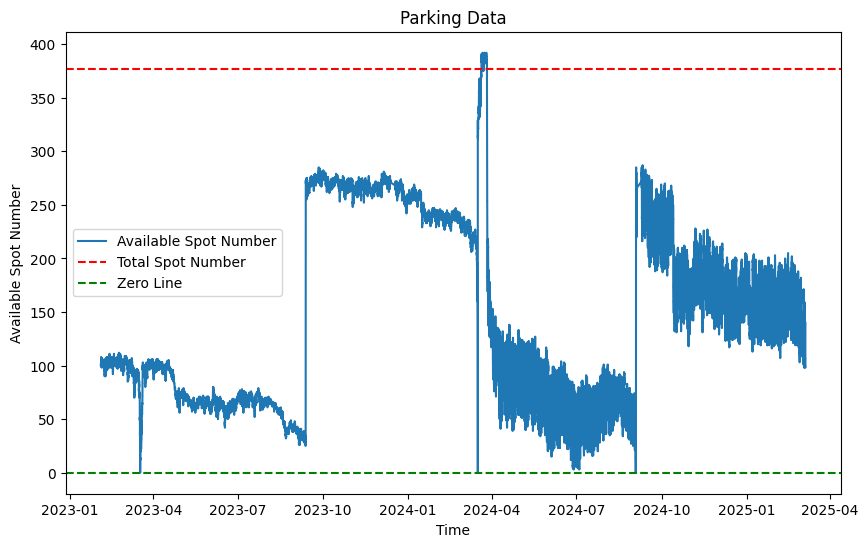



ID de aparcamiento  75


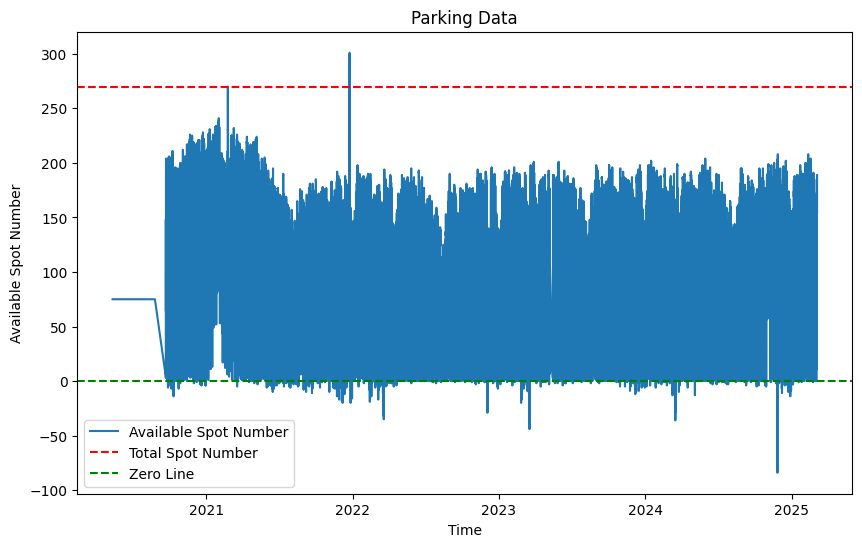



ID de aparcamiento  77


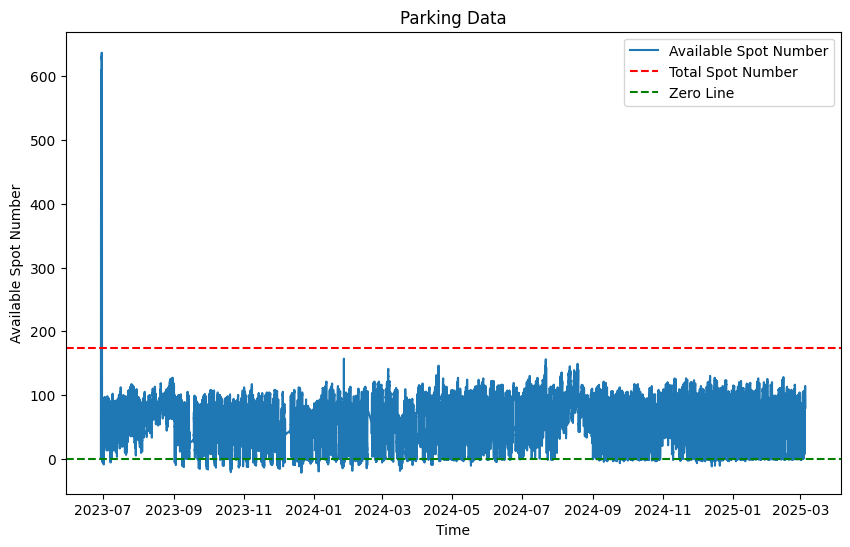



ID de aparcamiento  78


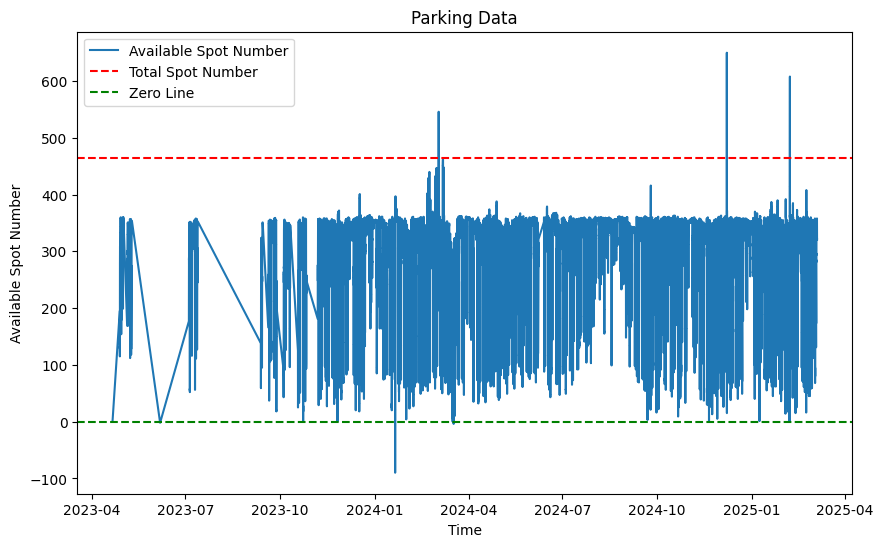



ID de aparcamiento  79


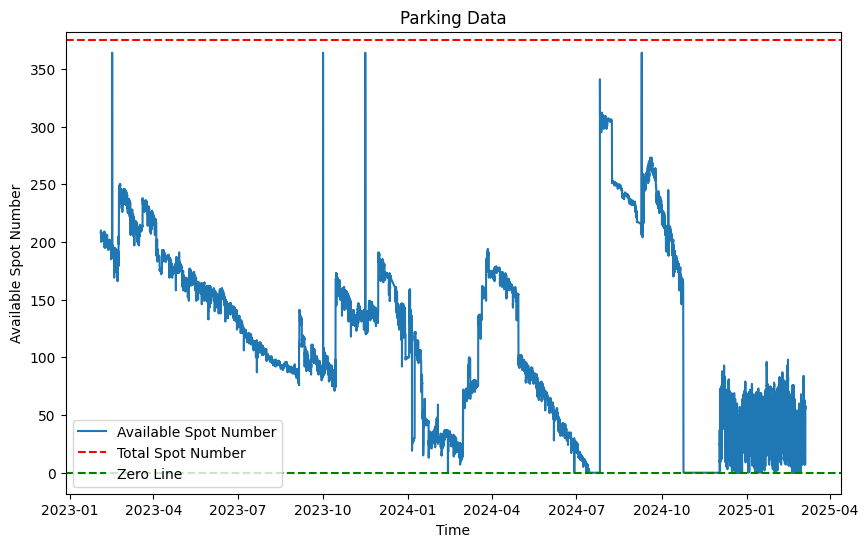



ID de aparcamiento  120


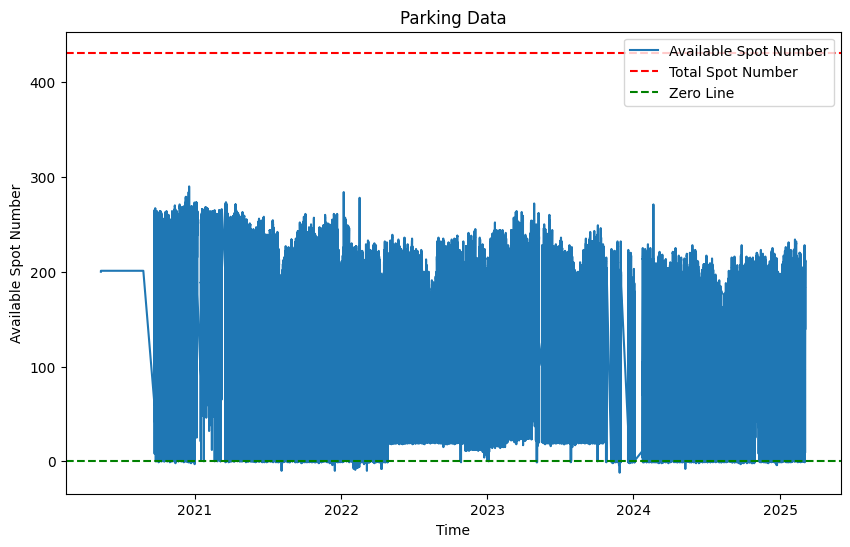

In [42]:
for parking in sorted(df.idAparcamiento.unique()):
    plot_parking_data(parking)

Eliminamos los registros que cumplen ambas condiciones, ya que parecen errores en las mediciones

In [43]:
df = df[df["availableSpotNumber"] <= df["totalSpotNumber"]]
df = df[df["availableSpotNumber"] >= 0]

## Selección de parkings para el estudio

In [44]:
df.groupby("idAparcamiento").count()

,availableSpotNumber,totalSpotNumber
idAparcamiento,,
-100.0,86271,86271
1.0,198655,198655
5.0,1401070,1401070
6.0,539081,539081
7.0,536818,536818
8.0,850081,850081
9.0,50,50
10.0,53,53
13.0,539110,539110


- Eliminamos los parkings -100, 1, 2, 3, 4, 9, 10 porque apenas hay datos.
    - Los parkings 2, 3 y 4 no aparecen ya que apenas había 10 registros y al aplicar el filtrado han desaparecido
- Recordar que también hay que eliminar el parking 5

In [45]:
# Lista de valores a eliminar
ids_a_eliminar = [-100, 1, 2, 3, 4, 5, 9, 10]

# Filtrar el DataFrame eliminando esos valores
df = df[~df["idAparcamiento"].isin(ids_a_eliminar)]

## CORRECCIÓN DE IRREGULARIDADES
- Puesto que el objetivo es predecir la ocupación por hora en cada parking, cada hora debe estar representada por un único valor

### HORAS CON VARIOS REGISTROS POR HORA
- Si para una hora de un día concreto hay varios registros, calculamos el promedio


In [46]:
# Crear columnas adicionales para agrupar por Año, Mes, Día y Hora
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["hour"] = df.index.hour


In [49]:
df = df.apply(pd.to_numeric, errors="coerce").groupby(["idAparcamiento", "year", "month", "day", "hour"]).mean().reset_index()


In [50]:
df["availableSpotNumber"] = df["availableSpotNumber"].round(0).astype(int)

In [51]:
# Convertir las columnas de fecha/hora en un nuevo índice datetime
df["recvTime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])
df.set_index("recvTime", inplace=True)

# Eliminar las columnas auxiliares de agrupación
df.drop(columns=["year", "month", "day", "hour"], inplace=True)

In [52]:
df

,idAparcamiento,availableSpotNumber,totalSpotNumber
recvTime,,,
2023-02-03 10:00:00,6,60,372.0
2023-02-03 11:00:00,6,48,372.0
2023-02-03 12:00:00,6,66,372.0
2023-02-03 13:00:00,6,119,372.0
2023-02-03 14:00:00,6,155,372.0
...,...,...,...
2025-03-05 03:00:00,120,210,431.0
2025-03-05 04:00:00,120,210,431.0
2025-03-05 05:00:00,120,208,431.0


## GUARDAR DATOS LIMPIOS

In [53]:
df.to_csv("../data/intermediate/df_intermediate.csv")